<h2>Exercise 1 - What is “k” in the k-means algorithm? Be specific.</h2>

**Answer:** It is the number of clusters that data is put into

<h2>Exercise 2 - What is the minimum number of variables/features required to perform clustering?</h2>

**Answer:** At least 2

<h2>Exercise 3 - Why is important to standardize the data before we run k-means algorithm?
</h2>

**Answer:**  The goal is to minimize the distances within each cluster and maximize the difference between the clusters. Make sure features are all on the same scale & Improve accuracy

<h2>Exercise 4 - Which of the following can act as possible termination conditions of the k-means algorithm?</h2>

**Answer:** All the above

<h2>Exercise 5 - Use customers.csv file to answer questions</h2>

In [97]:
#5a - Using the pandas library, read the csv file and create a data-frame called customers.

import pandas as pd
customers = pd.read_csv('customers.csv')
customers.head()

,ID,Visit_Time,Average_Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23


In [98]:
#5b - Using the appropriate Python commands, remove the ID variable.

customers = customers.drop(columns = 'ID', axis = True)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [99]:
#5c - Using the appropriate standardization formula, put all the variables on the same scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_std = scaler.fit_transform(customers.iloc[:,0:4])

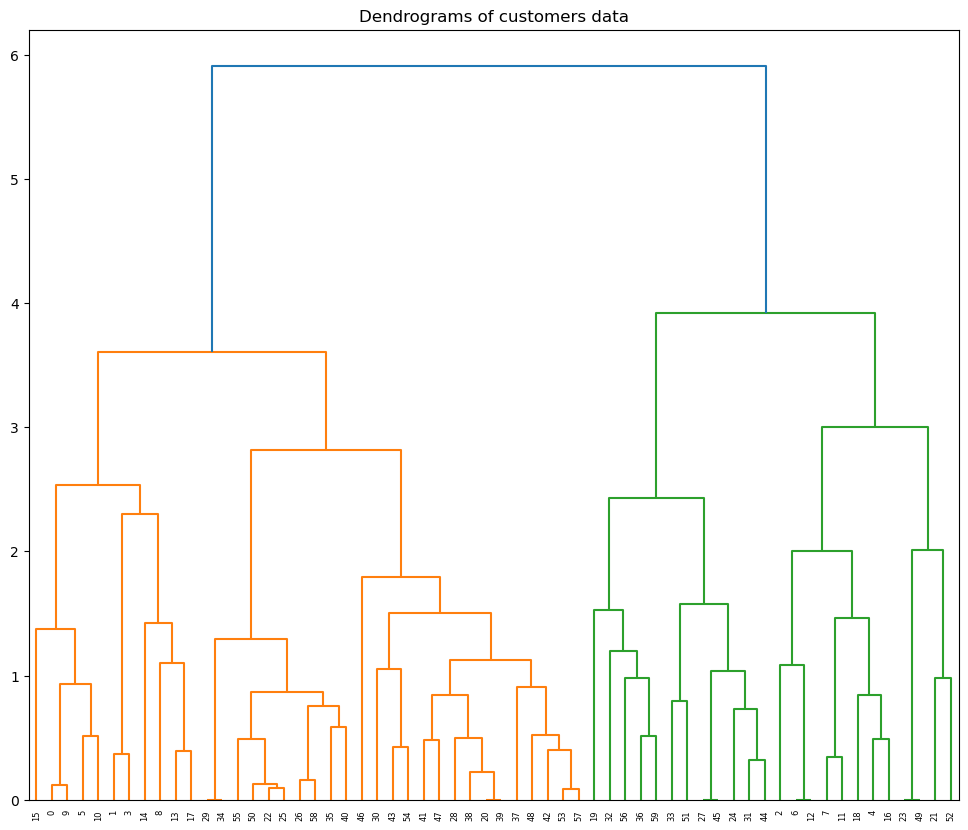

In [100]:
#5d - Cluster the data using hierarchical clustering. Use the average linkage. How many
# cluster do you see in the dendrogram?

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 10))
plt.title("Dendrograms of customers data")

## Here we visualize the dendogram
dend = shc.dendrogram(shc.linkage(features_std, 'complete'))
plt.show();

55 clusters

In [101]:
#5e - Using the KMeans function from the sklearn.cluster library, cluster the customers into four clusters. 
# Make sure you use standardized variables as the inputs in the kmeans algorithms, append the cluster labels to 
# the customers data-frame, and use n_init = 20 in the KMeans function.

from sklearn.cluster import KMeans

#Create KMeans object
four_clusters = KMeans(n_clusters = 4, n_init = 20, random_state = 42)

#Cluster data into 4 clusters
customers_4_clusters = four_clusters.fit(features_std)

#Here we see cluster labels
customers['cluster'] = customers_4_clusters.labels_
customers.head()

C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Visit_Time,Average_Expense,Sex,Age,cluster
0,3,5.7,0,10,0
1,5,14.5,0,27,0
2,16,33.5,0,32,2
3,5,15.9,0,30,0
4,16,24.9,0,23,2


In [102]:
#5f - describe the clusters from part e

cluster_1 = customers[customers['cluster'] == 0].reset_index(drop = True)

cluster_2 = customers[customers['cluster'] == 1].reset_index(drop = True)

cluster_3 = customers[customers['cluster'] == 2].reset_index(drop = True)

cluster_4 = customers[customers['cluster'] == 3].reset_index(drop = True)

In [106]:
import numpy as np
cluster_1.apply(np.sum, axis = 0)

Visit_Time          54.0
Average_Expense    139.8
Sex                  0.0
Age                187.0
cluster              0.0
dtype: float64

In [107]:
cluster_2.apply(np.sum, axis = 0)

Visit_Time         139.0
Average_Expense    273.2
Sex                 25.0
Age                387.0
cluster             25.0
dtype: float64

In [108]:
cluster_3.apply(np.sum, axis = 0)

Visit_Time         115.0
Average_Expense    204.7
Sex                  0.0
Age                213.0
cluster             16.0
dtype: float64

In [109]:
cluster_4.apply(np.sum, axis = 0)

Visit_Time         196.0
Average_Expense    405.8
Sex                 16.0
Age                499.0
cluster             48.0
dtype: float64

From the above, we can conclude a few things:<br>

Cluster 4 had the most total visit time<br>
Cluster 4 had the highest added total average expense<br>
Cluster 2 had the most males<br>
Cluster 4 had the highest combined ages<br>

(we could also do the mean and find the average visit time, expense and age per cluster)

<h2>Exercise 6 - Use customer_offers.csv file to answer questions</h2>

In [110]:
#6a - Using the pandas library, read the csv file and create a data-frame called customer_offers.

customer_offers = pd.read_csv('customer_offers.csv')
customer_offers.head()

,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [111]:
#6b - Using the appropriate commands, report a quick summary of each of the variables in customer_offers.

customer_offers.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.100000,0.100000,0.060000,0.120000,0.040000,0.120000,0.190000,0.200000,0.100000,0.070000,...,0.050000,0.120000,0.060000,0.15000,0.090000,0.060000,0.170000,0.220000,0.170000,0.040000
std,0.301511,0.301511,0.238683,0.326599,0.196946,0.326599,0.394277,0.402015,0.301511,0.256432,...,0.219043,0.326599,0.238683,0.35887,0.287623,0.238683,0.377525,0.416333,0.377525,0.196946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
#6c - Dropping customer_name
customer_offers = customer_offers.drop(columns = 'customer_name', axis = True)
customer_offers.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [95]:
#6d - Let’s assume that you are planning to use all the 32 variables in your clustering analysis. 
# Do we need to standardize the data? Explain. If so, use the min-max transformation

#We do not need to standardize the data because it is all already on a 0-1 scale

In [113]:
#6e - Using the KMeans function from the sklearn.cluster library, cluster the data into 3 clusters 
# (append the cluster membership to the data). Make sure you use n_init = 20 in the KMeans function

cluster_md = KMeans(n_clusters = 3, n_init = 20, random_state = 42).fit(customer_offers)

#Append
customer_offers['cluster'] = cluster_md.labels_
customer_offers.head()

C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [114]:
#6f - Describe each of the clusters from part e

cluster_1 = customer_offers[customer_offers['cluster'] == 0].reset_index(drop = True)

cluster_2 = customer_offers[customer_offers['cluster'] == 1].reset_index(drop = True)

cluster_3 = customer_offers[customer_offers['cluster'] == 2].reset_index(drop = True)

In [115]:
cluster_1.apply(np.sum, axis = 0)

1           9
2           4
3           4
4          12
5           4
6          11
7           3
8           3
9          10
10          4
11         13
12          3
13          0
14          9
15          6
16          4
17          0
18          1
19          4
20          6
21          2
22         20
23          4
24          0
25          6
26          3
27          7
28          5
29          1
30          6
31         17
32          4
cluster     0
dtype: int64

In [116]:
cluster_2.apply(np.sum, axis = 0)

1           0
2           0
3           2
4           0
5           0
6           1
7          16
8          17
9           0
10          2
11          0
12          1
13          6
14          0
15          0
16          0
17          0
18         13
19          1
20          0
21          2
22          1
23          0
24          0
25          0
26          0
27          1
28          1
29         16
30         16
31          0
32          0
cluster    35
dtype: int64

In [117]:
cluster_3.apply(np.sum, axis = 0)

1           1
2           6
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          1
11          0
12          1
13          0
14          0
15          0
16          1
17          7
18          0
19          0
20          0
21          0
22          0
23          1
24         12
25          0
26         12
27          1
28          0
29          0
30          0
31          0
32          0
cluster    32
dtype: int64

From the above, we can conclude the following:<br>

Champagne was the most popular for cluster 1<br>
Espumante was the most popular for cluster 2<br>
Pinot Noir was the most popular for cluster 3